<a href="https://colab.research.google.com/github/jvschlierf/Sim_Modeling-Networks-ships-reroutes/blob/main/analysis_eleonora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import time, enum, math
import numpy as np
import pandas as pd
import pylab as plt
from networkx.algorithms.shortest_paths.generic import has_path
import networkx as nx
import random
import pickle
import csv
from tqdm import tqdm, trange
from time import sleep

data_path = '/content/drive/MyDrive/Sim & Modeling/Output/'


with open((data_path + 'batch_out.pickle'), 'rb') as handle:
     batch_out = pickle.load(handle)

 
# with open(( data_path + 'batch_keys.csv')) as f:
#     batch_keys=[tuple(line) for line in csv.reader(f)]


# agent_state.to_csv((data_path + 'single_run_output.csv'), header = True)

# Single Run Analysis

In [26]:
single_run_none = pd.read_csv(data_path + 'open_single_run_out.csv')
single_run_suez = pd.read_csv(data_path + 'Suez_single_run_output.csv')
single_run_hormuz = pd.read_csv(data_path + 'Hormuz_single_run_output.csv')
single_run_malacca = pd.read_csv(data_path + 'Malacca_single_run_output.csv')
single_run_panama = pd.read_csv(data_path + 'Panama_single_run_output.csv')
single_run_gibraltar = pd.read_csv(data_path + 'Gibraltar_single_run_output.csv')
single_run_dover = pd.read_csv(data_path + 'Dover_single_run_output.csv')
single_run_all = pd.read_csv(data_path + 'Total_single_run_output.csv')

last_step = single_run_suez["Step"].max()

In [ ]:
single_run_all.head()

,Step,AgentID,Type,Foresight,Position,Ports of Interest,Itinerary,Distance_Traveled,Route,Route Changes,Destination not reachable,Complete,Success,Stuck
0,1,1,['Large'],3,3365,"[2088, 2005, 2033]","[2088, 3365, 6869, 6859, 6865, 6861, 3128, 233...",31.48,[2005],0,0,0,0,0
1,1,2,['Large'],5,3336,"[2817, 2005, 2817]","[2817, 3336, 3099, 3336, 7144, 3336, 6868, 333...",194.61,"[3336, 3099, 6959, 7144, 621, 6868, 6869, 7019...",0,0,0,0,0
2,1,3,['Normal'],4,2560,"[47914, 2034, 6797]","[47914, 2560, 2866, 842, 1594, 1342, 7026, 176...",19.42,[6797],0,0,0,0,0
3,1,4,['Large'],3,24543,"[1939, 2034, 4030, 1975, 4246]","[1939, 24543, 2928, 6260, 6919, 23786, 2132, 3...",93.63,"[2866, 7101, 4246, 7101, 2866, 842, 1594, 1342...",0,0,0,0,0
4,1,5,['Normal'],1,6861,"[3128, 2140, 2483]","[3128, 6861, 6865, 6859, 6869, 6868, 2140, 686...",6.36,[2483],0,0,0,0,0


In [ ]:
# ''' Groupby Step'''
step_none = single_run_none.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_suez = single_run_suez.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_hormuz = single_run_hormuz.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_malacca = single_run_malacca.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_panama = single_run_panama.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_dover = single_run_dover.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_gibraltar = single_run_gibraltar.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]
step_all = single_run_all.groupby("Step")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck"]

# ''' Groupby Type'''
type_none = single_run_none[single_run_none["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]
type_suez = single_run_suez[single_run_suez["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]
type_hormuz = single_run_hormuz[single_run_hormuz["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]
type_malacca = single_run_malacca[single_run_malacca["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"] 
type_panama = single_run_panama[single_run_panama["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]
type_dover = single_run_dover[single_run_dover["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]
type_gibraltar = single_run_gibraltar[single_run_gibraltar["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]
type_all = single_run_all[single_run_all["Step"]==last_step].groupby("Type")["Route Changes", "Destination not reachable", "Complete", "Success", "Stuck", "Distance_Traveled"]

In [ ]:
step_none = step_none.sum().diff(periods=1)
step_all = step_all.sum().diff(periods=1)
step_dover = step_dover.sum().diff(periods=1)
step_gibraltar = step_gibraltar.sum().diff(periods=1)
step_hormuz = step_hormuz.sum().diff(periods=1)
step_malacca = step_malacca.sum().diff(periods=1)
step_suez = step_suez.sum().diff(periods=1)
step_panama = step_panama.sum().diff(periods=1)

In [ ]:
steps = [step_dover, step_gibraltar, step_hormuz, step_malacca, step_none, step_panama, step_suez, step_all]
labels = [ 'Dover', 'Gibraltar', 'Hormuz', 'Malacca', 'None', 'Panama', 'Suez',  'Total']
columns = ['Route Changes',	'Destination not reachable',	'Complete',	'Success',	'Stuck']
t = np.arange(last_step)

types = [type_dover.sum(), type_gibraltar.sum(), type_hormuz.sum(), type_malacca.sum(), type_none.sum(), type_panama.sum(),  type_suez.sum(), type_all.sum()]
single_runs = [single_run_none, single_run_all, single_run_dover, single_run_gibraltar, single_run_hormuz, single_run_malacca, single_run_suez, single_run_panama]

In [ ]:
last = [run[run["Step"]==last_step][:] for run in single_runs]
last_steps = pd.concat(last,axis=0, keys=labels)
last_steps.head()

Step  AgentID        Type  ...  Complete  Success Stuck
Dover 44500    90        1   ['Large']  ...         2        2     0
      44501    90        2  ['Normal']  ...         1        1     0
      44502    90        3   ['Large']  ...         1        1     0
      44503    90        4  ['Normal']  ...         1        1     0
      44504    90        5   ['Small']  ...         1        1     0

[5 rows x 14 columns]

#STEPS

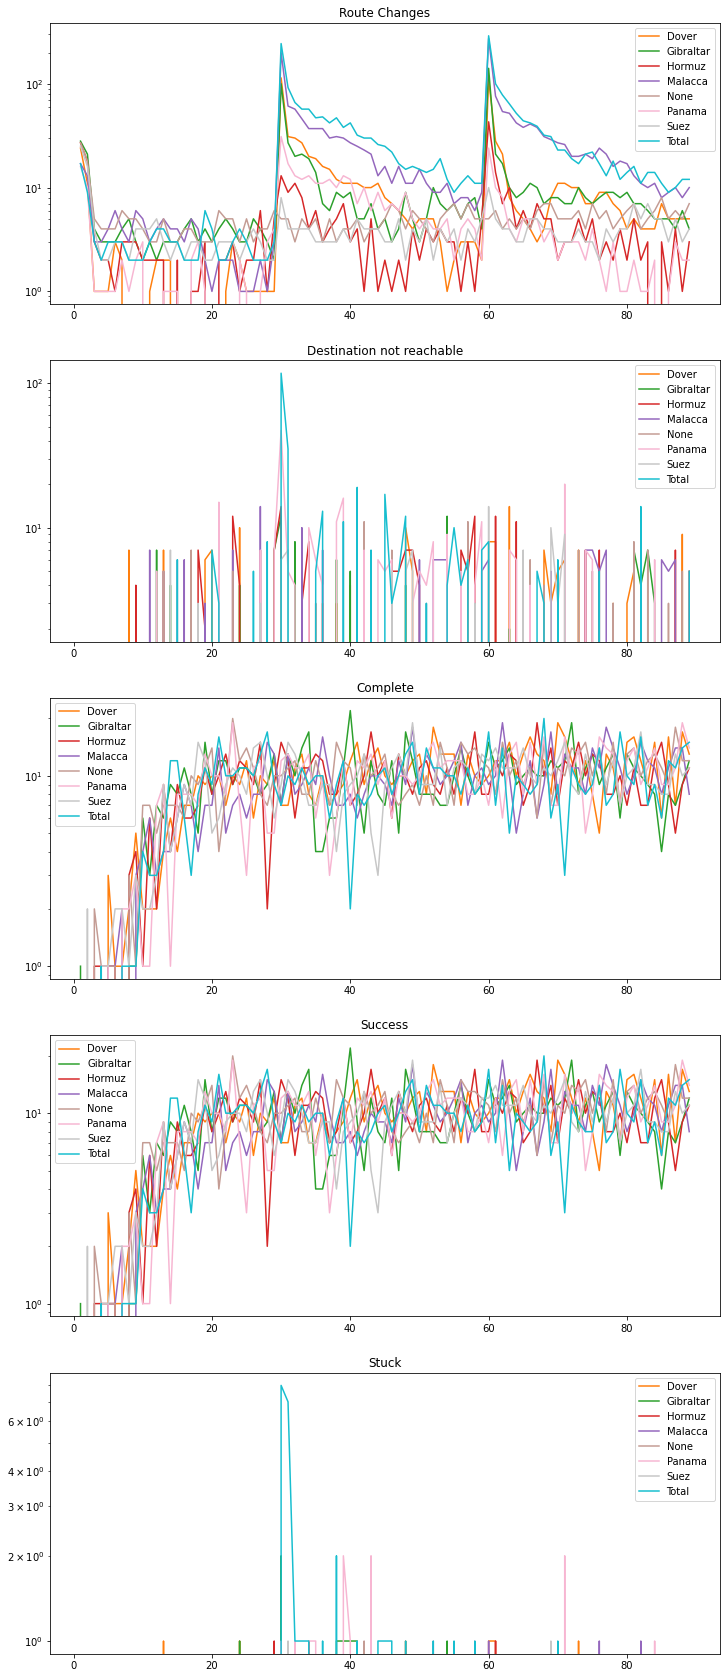

In [ ]:
'''
Plots WITH LOGS
'''

k = len(columns)
fig, ax = plt.subplots(k, facecolor='w', figsize=(12,30), squeeze=False)

color = plt.cm.tab20(np.linspace(0.1,0.9,len(steps)))
ax = ax.T.flatten()

for i in range(k):
    for j,c in zip(range(len(steps)),color):
        ax[i].plot(t, steps[j][:len(t)][[columns[i]]], c=c, label = labels[j])    
        ax[i].legend(fancybox = True)
    ax[i].set_title(columns[i])
    ax[i].set_yscale('log')
    



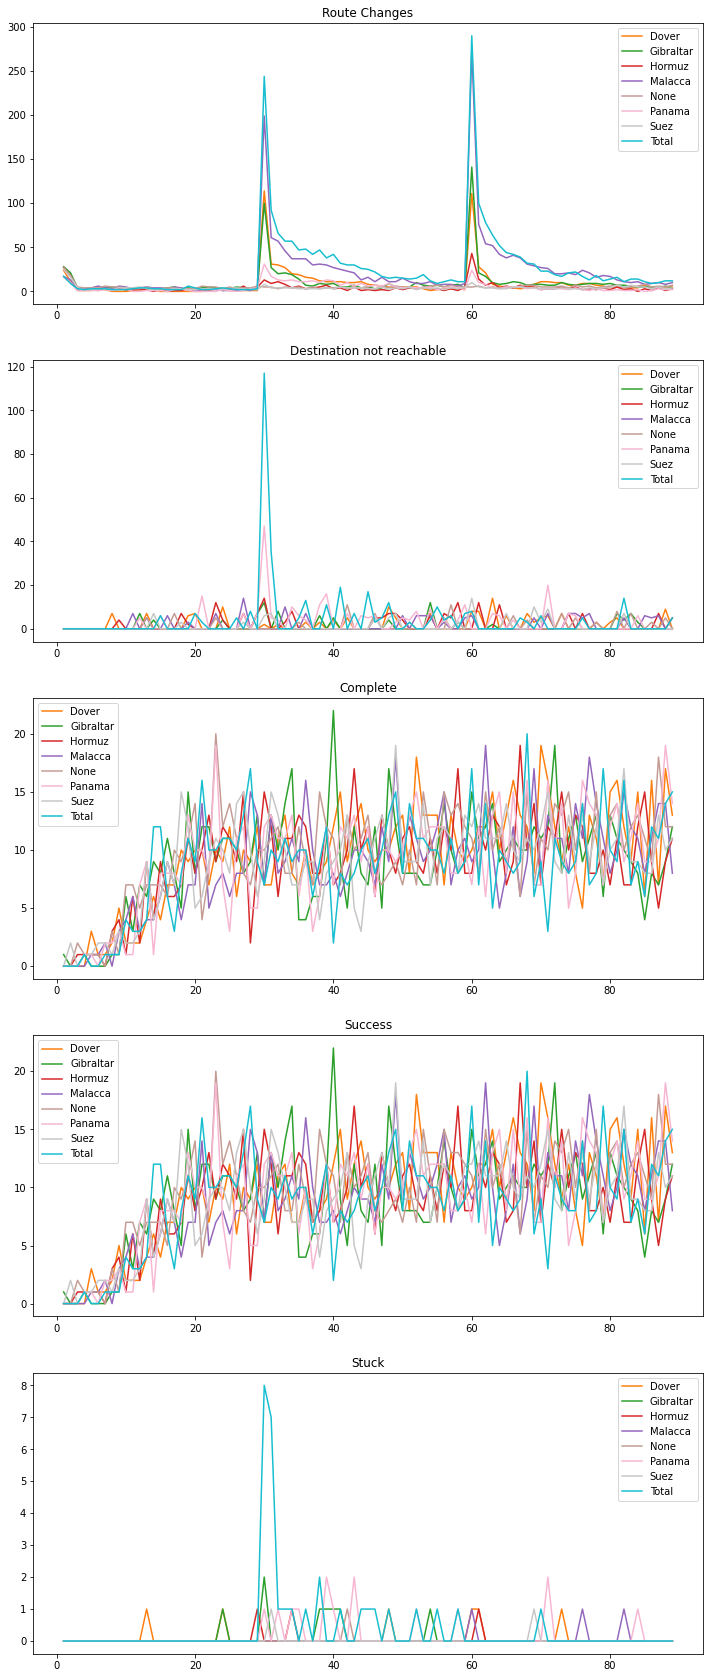

In [ ]:
'''
Plots WITHOUT LOG
'''
k = len(columns)
fig, ax = plt.subplots(k, facecolor='w', figsize=(12,30), squeeze=False)

color = plt.cm.tab20(np.linspace(0.1,0.9,len(steps)))
ax = ax.T.flatten()

for i in range(k):
    for j,c in zip(range(len(steps)),color):
        ax[i].plot(t, steps[j][:len(t)][[columns[i]]], c=c, label = labels[j])    
        ax[i].legend(fancybox = True)
    ax[i].set_title(columns[i])
    #ax[i].set_yscale('log')
    



# Type Analysis

In [45]:
types_df = pd.concat(types,axis=1, keys=labels).T
types_df["['Normal']"] =  types_df["['Normal']"] //2 #account for the ship distribution

In [ ]:
types_df.columns = ['Large', 'Normal', 'Small']
types_df

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

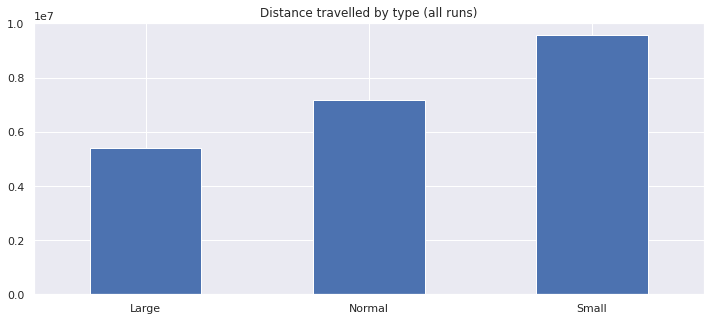

In [50]:
types_df.groupby(level = 1).sum().loc['Distance_Traveled'].plot(kind = "bar", figsize = (12,5), title = 'Distance travelled by type (all runs)')
plt.xticks(rotation = 0)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

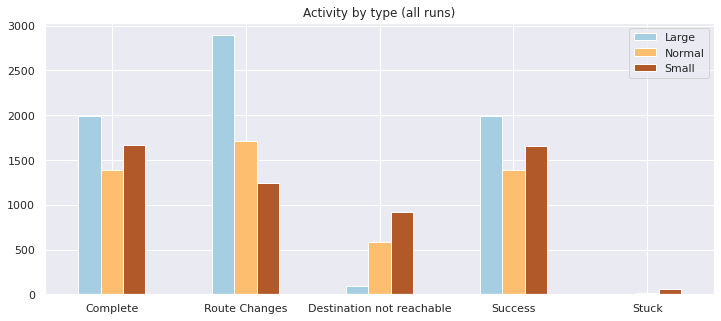

In [69]:
types_df.groupby(level = 1).sum().loc[['Complete', 'Route Changes', 'Destination not reachable', 'Success', 'Stuck']].plot(kind = "bar", figsize = (12,5),  colormap = 'Paired')
plt.title("Activity by type (all runs)")
plt.xticks(rotation = 0)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

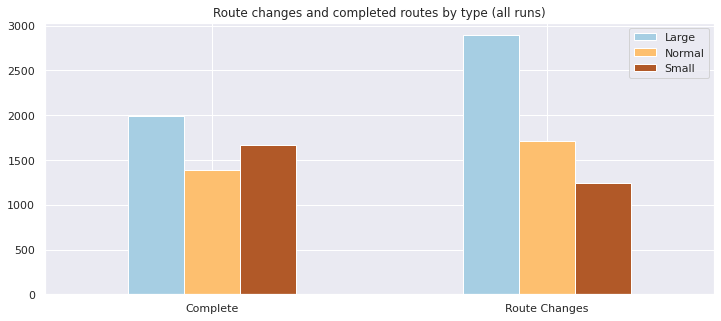

In [68]:
types_df.groupby(level = 1).sum().loc[['Complete', 'Route Changes']].plot(kind = "bar", figsize = (12,5),  colormap = 'Paired')
plt.title("Route changes and completed routes by type (all runs)")
plt.xticks(rotation = 0)

(array([0]), <a list of 1 Text major ticklabel objects>)

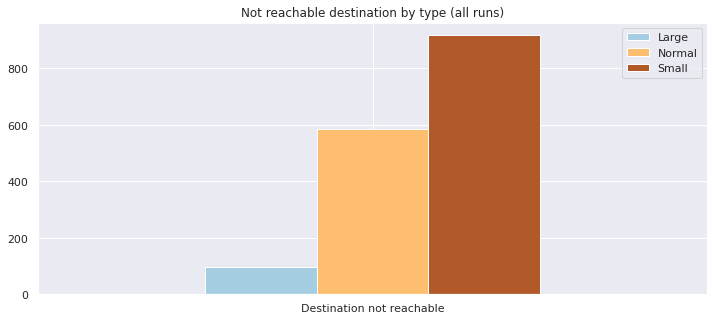

In [67]:
types_df.groupby(level = 1).sum().loc[['Destination not reachable']].plot(kind = "bar", figsize = (12,5), colormap = 'Paired')
plt.title("Not reachable destination by type (all runs)")
plt.xticks(rotation = 0)

In [ ]:
success=pd.DataFrame()
changes=pd.DataFrame()
destination=pd.DataFrame()
complete=pd.DataFrame()
stuck=pd.DataFrame()

for i in range(len(types)):
    changes = changes.append(types[i].T.loc[[columns[0]]])
    destination = destination.append(types[i].T.loc[[columns[1]]])
    complete = complete.append(types[i].T.loc[[columns[2]]])
    success = success.append(types[i].T.loc[[columns[3]]])
    stuck = stuck.append(types[i].T.loc[[columns[4]]])

changes['simulation'] = labels
destination['simulation'] = labels
complete['simulation'] = labels
success['simulation'] = labels
stuck['simulation'] = labels

success.columns = ['Large', 'Normal', 'Small', 'simulation']
changes.columns = ['Large', 'Normal', 'Small', 'simulation']
complete.columns = ['Large', 'Normal', 'Small', 'simulation']
destination.columns = ['Large', 'Normal', 'Small', 'simulation']
stuck.columns = ['Large', 'Normal', 'Small', 'simulation']

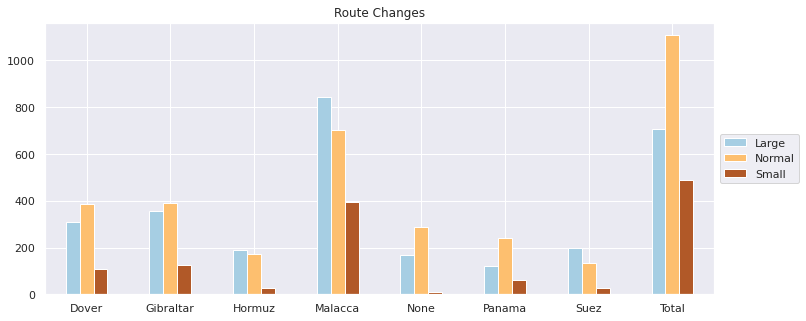

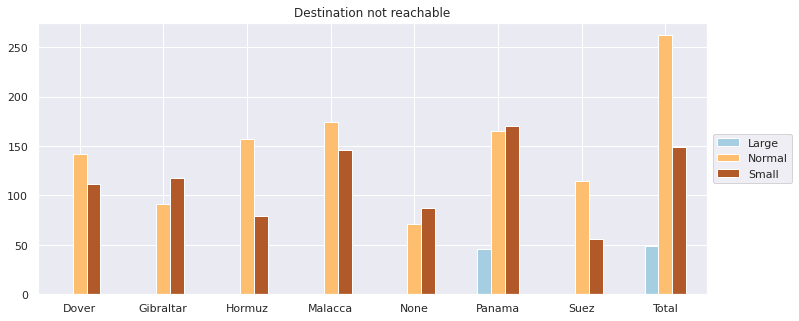

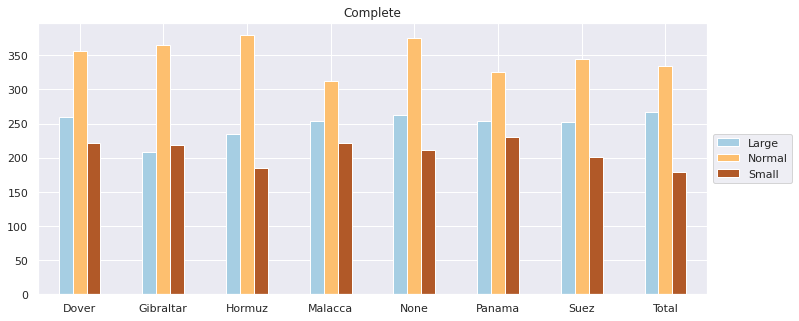

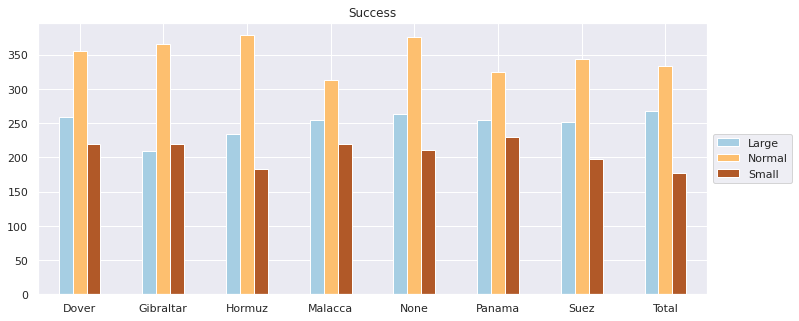

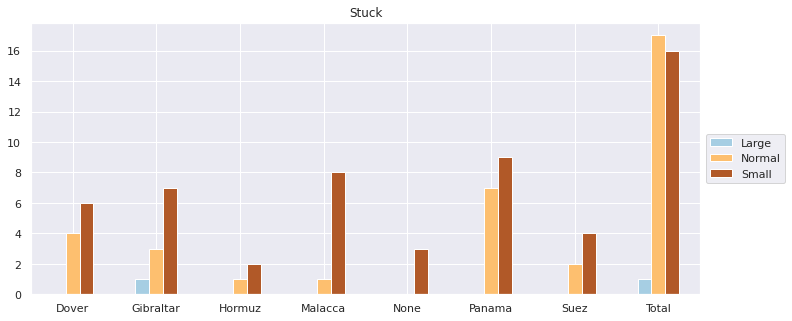

In [66]:
import seaborn as sns
sns.set_theme(color_codes=True)
sns.set_context('notebook')

dfs = [changes, destination, complete, success, stuck]
for i, df in enumerate(dfs):
   ax = df.plot(x='simulation', y = ['Large', 'Normal', 'Small'], kind='bar', title = columns[i], figsize = (12, 5), colormap = 'Paired', rot = 0)
   ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
   ax.xaxis.set_label_text("")

Text(0.5, 0, '')

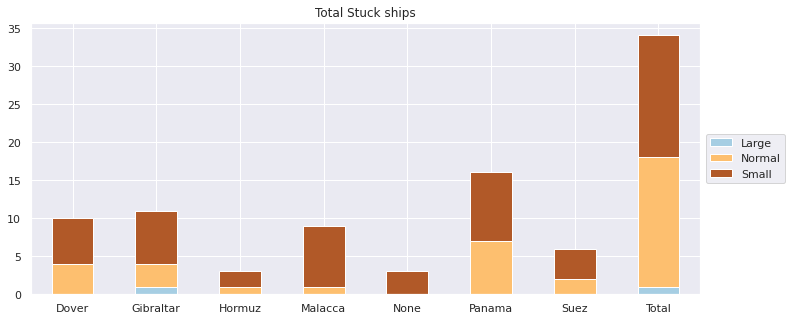

In [65]:
ax = stuck.plot(x='simulation', y = ['Large', 'Normal', 'Small'], kind='bar', title = 'Total Stuck ships', figsize = (12, 5), colormap = 'Paired', stacked = True, rot=0)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_label_text('')

Text(0.5, 0, '')

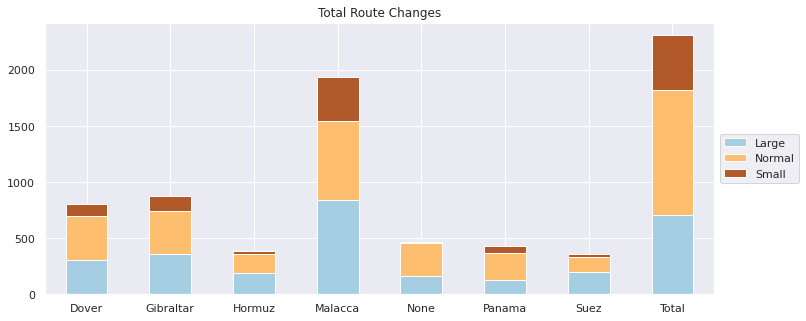

In [64]:
ax = changes.plot(x='simulation', y = ['Large', 'Normal', 'Small'], kind='bar', title = 'Total Route Changes', figsize = (12, 5), colormap = 'Paired', stacked = True, rot=0)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_label_text("")

Text(0.5, 0, '')

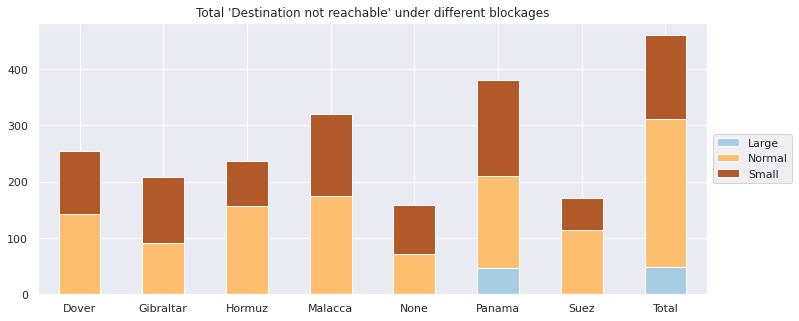

In [ ]:
ax = destination.plot(x='simulation', y = ['Large', 'Normal', 'Small'], kind='bar', title = "Total 'Destination not reachable' under different blockages", figsize = (12, 5), colormap = 'Paired', stacked = True, rot=0)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_label_text("")

In [ ]:
complete['Total Complete'] = complete['Large'] + complete['Normal'] + complete['Small']

Text(0.5, 0, '')

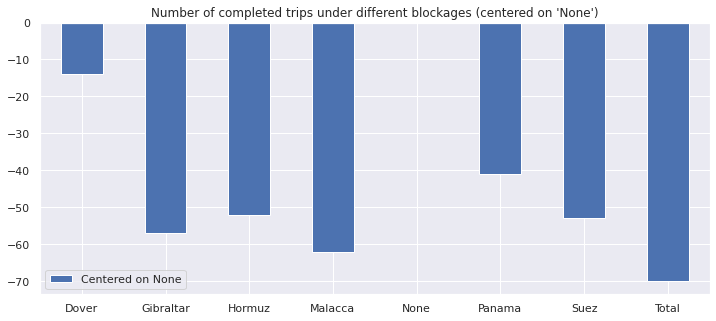

In [ ]:
complete['Centered on None'] = complete['Total Complete'] - complete[complete.simulation == 'None']['Total Complete']
ax = complete.plot(x='simulation', y = ['Centered on None'], kind='bar', title = "Number of completed trips under different blockages (centered on 'None')", figsize = (12, 5),  rot=0, sort_columns = True)
ax.xaxis.set_label_text("")

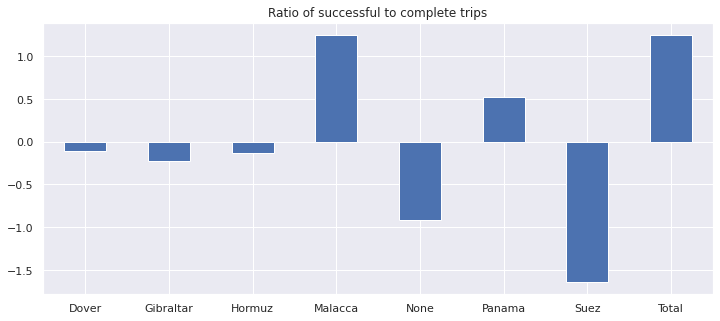

In [ ]:
complete_to_succcess = (last_steps.groupby(level = 0)["Success"].sum() / last_steps.groupby(level = 0)["Complete"].sum())
complete_to_succcess_norm = ((complete_to_succcess - complete_to_succcess.mean() ) / complete_to_succcess.std())
complete_to_succcess_norm.plot(kind = "bar", figsize = (12,5), title = 'Ratio of successful to complete trips', rot=0)

#Distance Analysis

In [35]:
distance = pd.DataFrame()
for i in range(len(types)):
    distance = distance.append(types[i].T.loc['Distance_Traveled'])
distance['simulation'] = labels
distance.columns = ['Large', 'Normal', 'Small', 'simulation']

In [ ]:
distance['total_distance'] = distance['Large']+distance['Normal']+ distance['Small']

Text(0.5, 0, '')

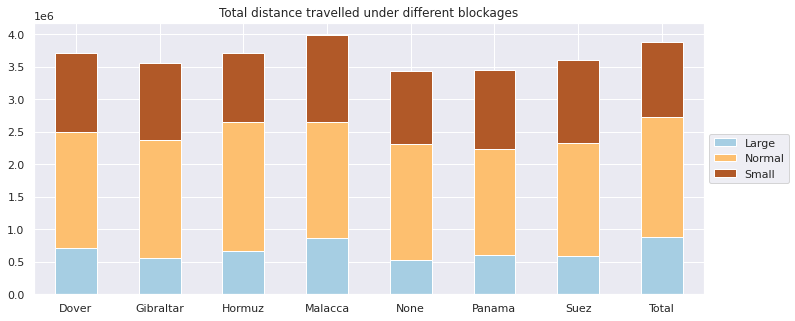

In [ ]:
ax = distance.plot(x='simulation', y = ['Large', 'Normal', 'Small'], kind='bar', title = 'Total distance travelled under different blockages', figsize = (12, 5), colormap = 'Paired', stacked = True, rot = 0)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.xaxis.set_label_text("")

Text(0.5, 0, '')

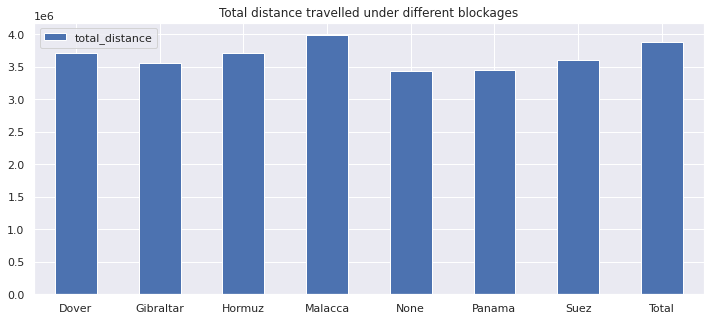

In [ ]:
ax = distance.plot(x='simulation', y = 'total_distance', kind='bar', title = 'Total distance travelled under different blockages' , figsize = (12, 5), stacked = True, rot = 0)
ax.xaxis.set_label_text("")

Text(0.5, 0, '')

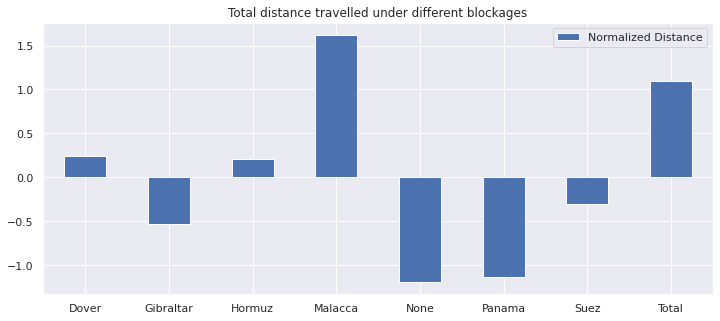

In [ ]:
distance['Normalized Distance'] = (distance['total_distance'] - distance['total_distance'].mean()) / distance['total_distance'].std()
ax = distance.plot(x='simulation', y = 'Normalized Distance', kind='bar', title = 'Total distance travelled under different blockages' , figsize = (12, 5), rot = 0)
ax.xaxis.set_label_text("")

Text(0.5, 0, '')

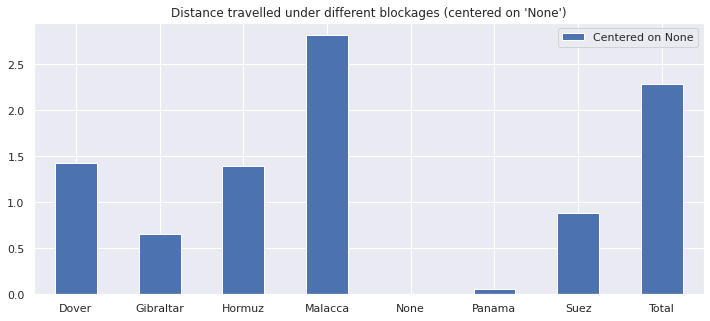

In [ ]:
distance['Total Distance'] = distance['Large'] + distance['Normal'] + distance['Small']
distance['Centered on None'] = (distance['Total Distance'] - distance[distance.simulation == 'None']['Total Distance']) / distance['Total Distance'].std()
ax = distance.plot(x='simulation', y = ['Centered on None'], kind='bar', title = "Distance travelled under different blockages (centered on 'None')", figsize = (12, 5),  rot=0)
ax.xaxis.set_label_text("")